In [1]:
from mpl_toolkits import mplot3d

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
C = 1

In [4]:
def reward(qos, power, C=1):
    return qos - C * np.log((power + 1) * 10)

In [5]:
qos = np.linspace(0, 1, 1000)
tput = np.linspace(0, 1, 1000)

X, Y = np.meshgrid(qos, tput)
Z = reward(X, Y, C=1)

In [6]:
df = pd.DataFrame(Z.flatten())
d = df.describe()

In [7]:
d[0]['max']

-1.302585092994046

In [8]:
scale = d[0]['max'] - d[0]['min']
Z = (Z - d[0]['min']) / scale

In [9]:
print("Reward function")
print("(qos - {} * log((power + 1) * 10) - {}) / {}".format(C, d[0]['min'], scale))

Reward function
(qos - 1 * log((power + 1) * 10) - -2.995732273553991) / 1.693147180559945


Text(0.5, 0, 'reward')

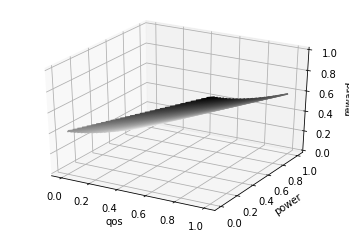

In [10]:

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.contour3D(X, Y, Z, 50, cmap='binary')

ax.set_xlabel('qos')
ax.set_ylabel('power')
ax.set_zlabel('reward')

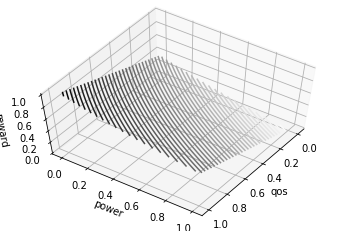

In [11]:
ax.view_init(60, 35)
fig

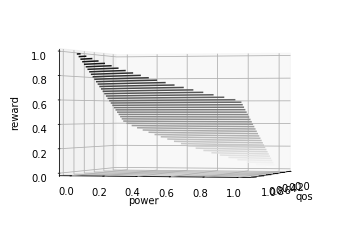

In [12]:
ax.view_init(0, 15)
fig

In [13]:
pd.DataFrame(Z.flatten()).describe()

,0
count,1000000.000000
mean,0.476564
std,0.206865
min,0.000000
25%,0.321967
50%,0.476561
75%,0.626479
max,1.000000


In [14]:
from pylab import cm, imshow, contour, clabel, colorbar, axis, title, show

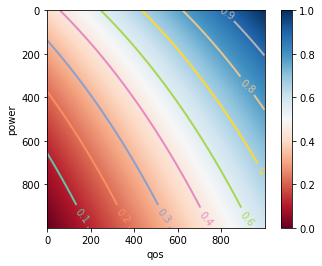

In [15]:
# labels = np.linspace(0, 1, 1000)
im = plt.imshow(Z, cmap=cm.RdBu)
# plt.xticks(labels)
# plt.yticks(labels)
ax = plt.gca()
ax.set_xlabel('qos')
ax.set_ylabel('power')


# adding the Contour lines with labels
cset = contour(Z, np.linspace(0, 1, 10), linewidths=2, cmap=cm.Set2)
clabel(cset,inline=True,fmt='%1.1f',fontsize=10)

colorbar(im) # adding the colobar on the right

Notice that the graph above has an error: it shows the wrong values in the axis